### Kaggle: IBM Attrition

Uncover the factors that lead to employee attrition and explore important questions such as:

1. Show a breakdown of distance from home by job role and attrition.

2. Compare average monthly income by education and attrition.

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import IBM_Attrition csv

In [4]:
attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


1. Show a breakdown of distance from home by job role and attrition.

#Display only attrition, Distance from home and job role

In [6]:
df = attrition.iloc[0:, [1,5,-20]]
df

,Attrition,DistanceFromHome,JobRole
0,Yes,1,Sales Executive
1,No,8,Research Scientist
2,Yes,2,Laboratory Technician
3,No,3,Research Scientist
4,No,2,Laboratory Technician
...,...,...,...
1465,No,23,Laboratory Technician
1466,No,6,Healthcare Representative
1467,No,4,Manufacturing Director
1468,No,2,Sales Executive


In [27]:
df.groupby('JobRole').sum()

,DistanceFromHome
JobRole,
Healthcare Representative,1282
Human Resources,425
Laboratory Technician,2437
Manager,819
Manufacturing Director,1375
Research Director,675
Research Scientist,2632
Sales Executive,3149
Sales Representative,719


Text(0.5, 0, 'Job Role')

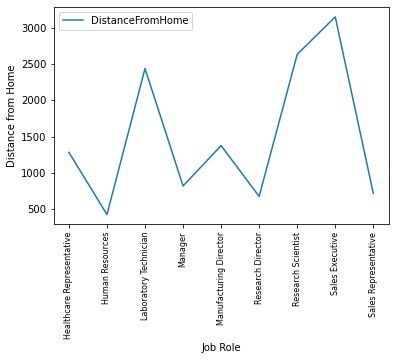

In [26]:
df.groupby('JobRole').sum().plot()
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Distance from Home')
plt.xlabel('Job Role')

In [9]:
df.groupby('Attrition').sum()

,DistanceFromHome
Attrition,
No,10993
Yes,2520


2. Compare average monthly income by education and attrition.

In [10]:
df1 = attrition.iloc[0:, [1,6,-17]]
df1

,Attrition,Education,MonthlyIncome
0,Yes,2,5993
1,No,1,5130
2,Yes,2,2090
3,No,4,2909
4,No,1,3468
...,...,...,...
1465,No,2,2571
1466,No,1,9991
1467,No,3,6142
1468,No,3,5390


Comparison of average monthly income and education

In [11]:
df1.groupby('Education').sum()

,MonthlyIncome
Education,
1,958897
2,1755914
3,3727875
4,2719296
5,397327


Text(0, 0.5, 'Monthly Income')

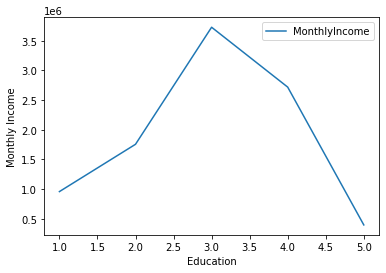

In [28]:
df1.groupby('Education').sum().plot()
plt.ylabel('Monthly Income')
#plt.xlabel('Education')

Comparison of average monthly income and Attrition

In [13]:
df1.iloc[0:,[0,2]].groupby('Attrition').sum()

,MonthlyIncome
Attrition,
No,8424768
Yes,1134541


In [128]:
#df1.iloc[0:,[0,2]].groupby('Attrition').sum().plot()
df2 = df1.iloc[0:,[0,2]].groupby('Attrition').sum()
#df2.iloc[0:,0:0]
#df2['MonthlyIncome']
#plt.bar(x=df2.iloc[0:,0:0],height=df2['MonthlyIncome'])

#plt.bar(x=df2.iloc[0:,0:0],height=df2.iloc[0:,0:0])

In [130]:
df1.iloc[0:,[0,2]].groupby('Attrition').sum().to_csv('AttritionvsMonthlyIncome.csv')
AttritionvsMonthlyIncome = pd.read_csv('AttritionvsMonthlyIncome.csv')
AttritionvsMonthlyIncome

,Attrition,MonthlyIncome
0,No,8424768
1,Yes,1134541


Text(0.5, 0, 'Attrition')

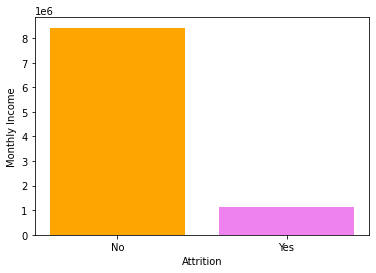

In [169]:
colors = np.where(AttritionvsMonthlyIncome['Attrition'] == 'No', 'orange', 'violet')
plt.bar(x=AttritionvsMonthlyIncome['Attrition'],height=AttritionvsMonthlyIncome['MonthlyIncome'], color=colors)
plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
#AttritionvsMonthlyIncome['Attrition'].Colours = ['#034694','#001C58']
#colors = np.where(a.index.isin(df.loc[df[1] == 1, 0].unique()), 'orange', 'blue')
#a.plot(kind='bar', color=colors)
#AttritionvsMonthlyIncome.iloc[0:,0:1]
#AttritionvsMonthlyIncome.plot()
#AttritionvsMonthlyIncome['MonthlyIncome']